[2982, 425, 105, 88]
[0.6877022653721683, 0.16990291262135923, 0.1423948220064725]


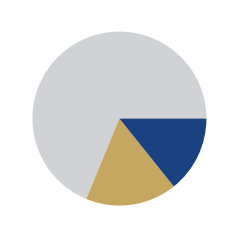

In [40]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import glob
from tqdm import tqdm

file = "pokemon-images/images/absol.png"

imgfile = Image.open(file)
numarray = numpy.array(imgfile.getdata(), numpy.uint8)
cluster_count = 4

mclusters = MiniBatchKMeans(n_clusters = cluster_count)
mclusters.fit(numarray.reshape(-4, 4))

npbins = numpy.arange(0, cluster_count+1)
histogram = numpy.histogram(mclusters.labels_, bins=npbins)
labels = numpy.unique(mclusters.labels_)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(mclusters.labels_, bins=npbins)
Histsorted = sorted(histogram[0] ,reverse=True)
labels = numpy.unique(mclusters.labels_)

couleurs = mclusters.cluster_centers_[1:].tolist()
    
print(Histsorted)

#Calcul des coefficients de couleur

couleur_percentage = [Histsorted[i] / sum(Histsorted[1:]) for i in range(1, len(Histsorted))]
print(couleur_percentage)

fig1, ax1 = plot.subplots()
pieColor = []
for i in range(cluster_count-1):
    pieColor.append('#%02x%02x%02x' % (math.ceil(couleurs[i][0]),
        math.ceil(couleurs[i][1]), math.ceil(couleurs[i][2])))

pieList = plot.pie(Histsorted[1:], colors=pieColor)


  
plot.show()



In [123]:
file_data = open('data.csv', 'r+') #14 éléments par pokemon chemin + 3*4(RGBA) couleurs  + taille en pixels colorés
file_pokemon = open('pokemon.csv', 'r')

reader_data = csv.reader(file_data,delimiter=',')
reader_pokemon = csv.reader(file_pokemon,delimiter=',')

liste_data =  []
liste_pokemon = []

for row in reader_data:
    liste_data.append(row)

for row in reader_pokemon:
    liste_pokemon.append(row)
    

In [124]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import glob
from tqdm import tqdm_notebook as tqdm


data = []
images = glob.glob("pokemon-images/images/*png")


for imgName in tqdm(images):
    imgfile = Image.open(imgName)
    numarray = numpy.array(imgfile.getdata(), numpy.uint8)
    cluster_count = 4

    mclusters = MiniBatchKMeans(n_clusters = cluster_count)
    mclusters.fit(numarray.reshape(-4, 4))

    npbins = numpy.arange(0, cluster_count+1)
    histogram = numpy.histogram(mclusters.labels_, bins=npbins)
    labels = numpy.unique(mclusters.labels_)

    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(mclusters.labels_, bins=npbins)
    Histsorted = sorted(histogram[0] ,reverse=True)
    labels = numpy.unique(mclusters.labels_)

    couleurs = mclusters.cluster_centers_[1:].tolist()
    
    #Calcul des coefficients des couleurs 
    couleur_percentage = [Histsorted[i] / sum(Histsorted[1:]) for i in range(1, len(Histsorted))]

    #Calcul de la taille
    compteur = 0
    for i in range(imgfile.size[0]):
        for j in range(imgfile.size[1]):
            if imgfile.getpixel((i,j)) == (0,0,0,0):
                compteur += 1

    compteur = imgfile.size[0]*imgfile.size[1] - compteur

    imagedata = []
    imagedata.append(couleurs[0])
    imagedata.append(couleurs[1])
    imagedata.append(couleurs[2])
    imagedata.append(compteur)
    imagedata.append(imgName)
    imagedata.append(couleur_percentage[0])
    imagedata.append(couleur_percentage[1])
    imagedata.append(couleur_percentage[2])
    
    #Searching types
    pokemonName = imgName[22:-4]
    for pokemon in liste_pokemon:
        types = []
        if(pokemon[0] == pokemonName):
            types = pokemon[1:]
            if(len(types) < 2):
                type1 = types[0]
                type2 = ""
            else:
                type1 = types[0]
                type2 = types[1]
                
    imagedata.append(type1)
    imagedata.append(type2)


    data.append(imagedata)
    


print("done")





done


In [126]:
import csv


with open('data.csv', 'w', newline='') as csvfile:
    fieldnames = ["Nom", "Couleur1.1","Couleur1.2","Couleur1.3", "Percentage1", "Couleur2.1","Couleur2.2","Couleur2.3","Percentage2", "Couleur3.1", "Couleur3.2", "Couleur3.3", "Percentage3", "Taille", "Type1", "Type2"]
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    
    for i in tqdm(data):
        writer.writerow({'Nom': i[4],
                        'Couleur1.1': i[0][0], 
                         'Couleur1.2': i[0][1],
                        'Couleur1.3' : i[0][2],
                         'Percentage1': i[5],
                        'Couleur2.1': i[1][0],
                        'Couleur2.2': i[1][1],
                        'Couleur2.3': i[1][2],
                        'Percentage2': i[6],
                        'Couleur3.1': i[2][0],
                        'Couleur3.2': i[2][1],
                        'Couleur3.3': i[2][2],
                        'Percentage3': i[7],
                        'Taille': i[3],
                       'Type1': i[8],
                       'Type2': i[9]})
        
print("done")

 

done


Select your favorite Pokemon croconaw
Searching the Pokemon


processing data


4


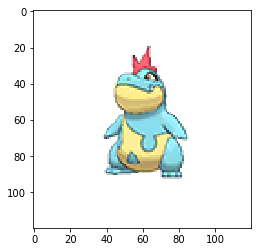

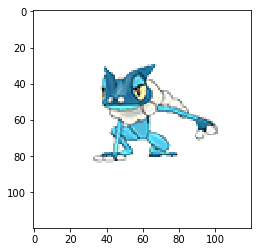

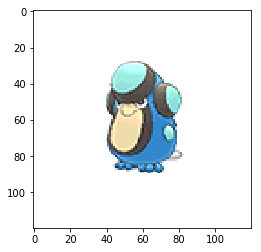

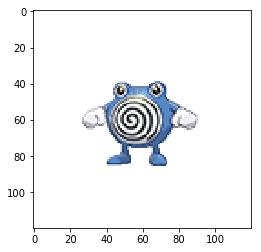

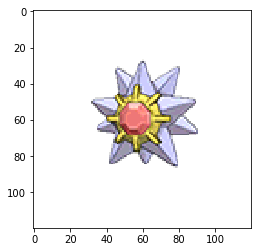

In [165]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import csv

from colormath.color_objects import sRGBColor, LabColor
from colormath.color_conversions import convert_color
from colormath.color_diff import delta_e_cie2000

file = open('data.csv', 'r')

pokemon = input("Select your favorite Pokemon ")

pokemonFound = []


reader = csv.reader(file, delimiter=',')

print("Searching the Pokemon")

for row in tqdm(reader):
    if(row[0][22:-4] == pokemon):
        pokemondata = row
        
file = open('data.csv', 'r')

reader = csv.reader(file, delimiter=',')
print("processing data")
for row in tqdm(reader):
    
    #check if the pokemon is not the same
    if(row[0][22:-4] == pokemon):
        continue
        
    #Check if one type matches the pokemon
    elif(not(row[14] == pokemondata[14] or (row[15] == pokemondata[15] and row[15] != ""))):
        continue
        
    else:
        #Search for the same first color
        FirstColor = sRGBColor(float(pokemondata[1]), float(pokemondata[2]), float(pokemondata[3]))
        iteratedColor = sRGBColor(float(row[1]), float(row[2]), float(row[3]))

        #Processing first color
        color1_lab = convert_color(FirstColor, LabColor)

        color2_lab = convert_color(iteratedColor, LabColor)

        delta_e = delta_e_cie2000(color1_lab, color2_lab);

        #Processing second color
        SecondColor = sRGBColor(float(pokemondata[5]), float(pokemondata[6]), float(pokemondata[7]))
        iteratedColor = sRGBColor(float(row[5]), float(row[6]), float(row[7]))

        color1_lab_1 = convert_color(SecondColor, LabColor)

        color2_lab_1 = convert_color(iteratedColor, LabColor)

        delta_e_2 = delta_e_cie2000(color1_lab_1, color2_lab_1);


        #Processing third color
        ThirdColor = sRGBColor(float(pokemondata[9]), float(pokemondata[10]), float(pokemondata[11]))
        iteratedColor2 = sRGBColor(float(row[9]), float(row[10]), float(row[11]))

        color1_lab_2 = convert_color(ThirdColor, LabColor)

        color2_lab_2 = convert_color(iteratedColor2, LabColor)

        delta_e_3 = delta_e_cie2000(color1_lab_2, color2_lab_2);
    
        coef_delta_e = 100
        coef_size = 500
        coef_percent = 0.01
        if(delta_e < coef_delta_e):
            if(abs(int(row[13]) - int(pokemondata[13])) < coef_size):
                if (abs(float(row[4]) - float(pokemondata[4])) < coef_percent):
                    pokemonFound.append(row[0])
                    continue
        if (delta_e_2 < coef_delta_e):
            if(abs(int(row[13]) - int(pokemondata[13])) < coef_size): 
                if(abs(float(row[8]) - float(pokemondata[8])) < coef_percent):
                    pokemonFound.append(row[0])
                    continue
        if(delta_e_3 < coef_delta_e): 
            if (abs(int(row[13]) - int(pokemondata[13])) < coef_size): 
                if(abs(float(row[12]) - float(pokemondata[12])) < coef_percent):
                    pokemonFound.append(row[0])
                    continue
                    
                    

print(len(pokemonFound))
        
plt.figure()
plt.imshow(mpimg.imread(pokemondata[0]))

        
for i in range(len(pokemonFound)):
    if(i<len(pokemonFound)):
        plt.figure()
        plt.imshow(mpimg.imread(pokemonFound[i]))
    

    

In [135]:
pokemonName = input("Pokemon ")

for pokemon in liste_pokemon:
    types = []
    if(pokemon[0] == pokemonName):
        types = pokemon[1:]
        if(len(types) < 2):
            type1 = types[0]
            type2 = ""
        else:
            type1 = types[0]
            type2 = types[1]
        print(pokemonName + ": " + type1 + " et  " + type2)

Pokemonchimchar
chimchar: Fire et  
